In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Color Image Visualization & Cropping

(92, 92)
(np.uint8(172), np.uint8(92), np.uint8(67))
(np.uint8(50), np.uint8(158), np.uint8(168))


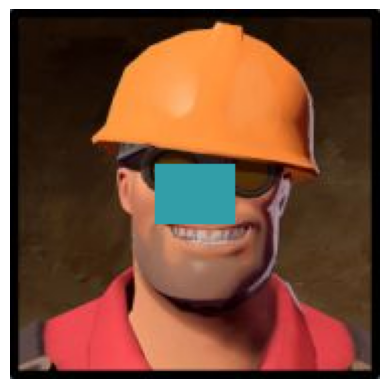

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

a=cv2.imread('pictures/tf2_engineer.jpg')
b=cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
s=b.shape
cy=s[0]//2
cx=s[1]//2
print((cy,cx))
print(tuple(b[cy,cx]))

r,g,bh=int("32",16),int("9e",16),int("a8",16)
h,w=30,40
y1=cy-h//2
y2=cy+h//2
x1=cx-w//2
x2=cx+w//2
d=b.copy()
d[y1:y2,x1:x2]=[r,g,bh]
print(tuple(d[cy,cx]))
plt.imshow(d)
plt.axis('off')
plt.show()

## 2. Negative of a Grayscale Image

(np.int64(228), np.int64(23)) 104 151
(np.int64(44), np.int64(329)) 140 115
(np.int64(576), np.int64(548)) 118 137
(np.int64(479), np.int64(621)) 102 153
(np.int64(155), np.int64(432)) 159 96


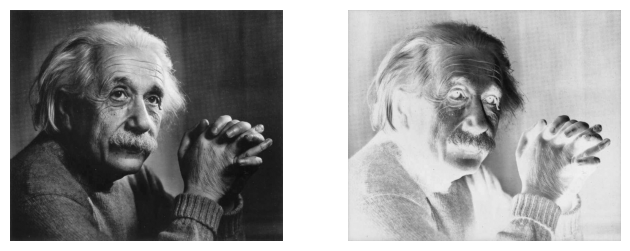

In [7]:
import random
img=cv2.imread('pictures/einstein.tif',0)
inv=255-img
random.seed(123)
ys=np.random.choice(img.shape[0],5)
xs=np.random.choice(img.shape[1],5)
for j in range(5):
    print((ys[j],xs[j]),img[ys[j],xs[j]],inv[ys[j],xs[j]])
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].imshow(img,cmap='gray');ax[0].axis('off')
ax[1].imshow(inv,cmap='gray');ax[1].axis('off')
plt.show()

## 3. Logarithmic Transformation

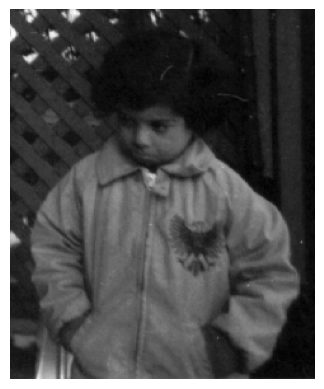

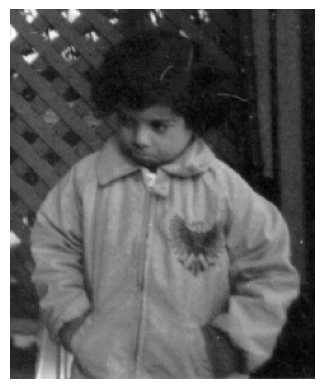

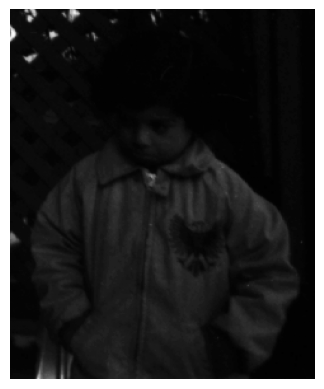

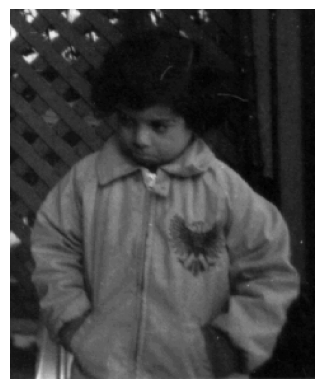

In [12]:
pout = cv2.imread('pictures/pout.tif', 0)
plt.imshow(pout, cmap='gray')
plt.axis('off')
plt.show()

c_val = 255 / np.log1p(np.max(pout))
log_out = (c_val * np.log1p(pout)).astype(np.uint8)
plt.imshow(log_out, cmap='gray')
plt.axis('off')
plt.show()

inv_log_orig = np.expm1(pout / c_val)
plt.imshow(np.clip(inv_log_orig, 0, 255).astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

inv_log_log = np.expm1(log_out / c_val)
plt.imshow(np.clip(inv_log_log, 0, 255).astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

## 4. Image Sharpening Using Unsharp Masking

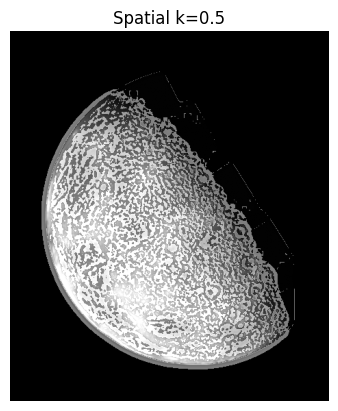

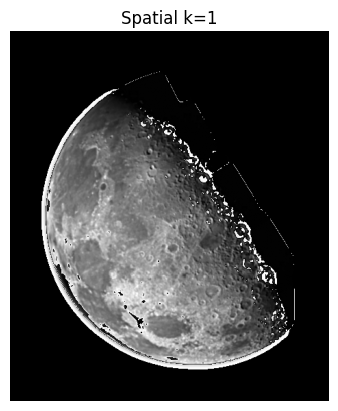

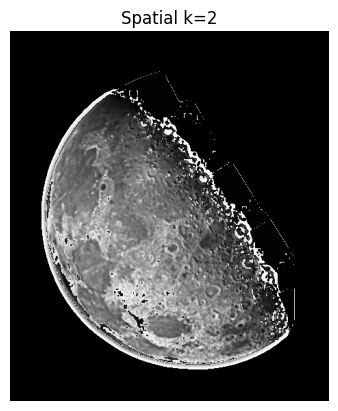

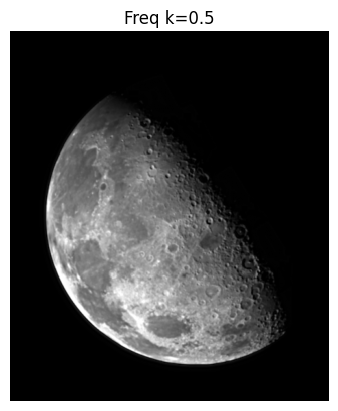

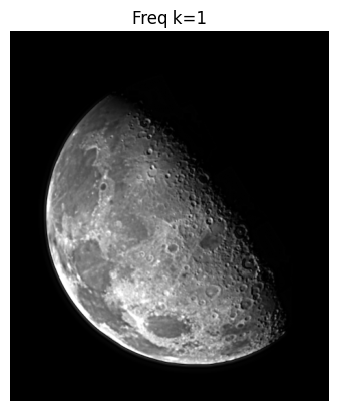

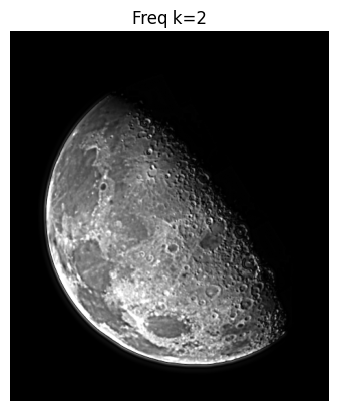

In [14]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift

moon = cv2.imread('pictures/moon.tif', 0)
ks = [0.5, 1, 2]

for factor in ks:
    gb = cv2.GaussianBlur(moon, (15, 15), 0)
    mask = moon - gb
    spatial = np.clip(moon + factor * mask, 0, 255).astype(np.uint8)
    plt.imshow(spatial, cmap='gray')
    plt.title(f"Spatial k={factor}")
    plt.axis('off')
    plt.show()

def butterworth(shape, d0):
    m, n = shape
    y, x = np.ogrid[:m, :n]
    center = (m//2, n//2)
    dist = np.sqrt((y - center[0])**2 + (x - center[1])**2)
    return 1 / (1 + (d0 / (dist+1e-6))**4)

F = fftshift(fft2(moon))
bw = butterworth(moon.shape, 35)
for factor in ks:
    G = (1 + factor * bw) * F
    img_f = np.abs(ifft2(ifftshift(G)))
    plt.imshow(np.clip(img_f, 0, 255).astype(np.uint8), cmap='gray')
    plt.title(f"Freq k={factor}")
    plt.axis('off')
    plt.show()

## 5. Salt & Pepper Noise Reduction

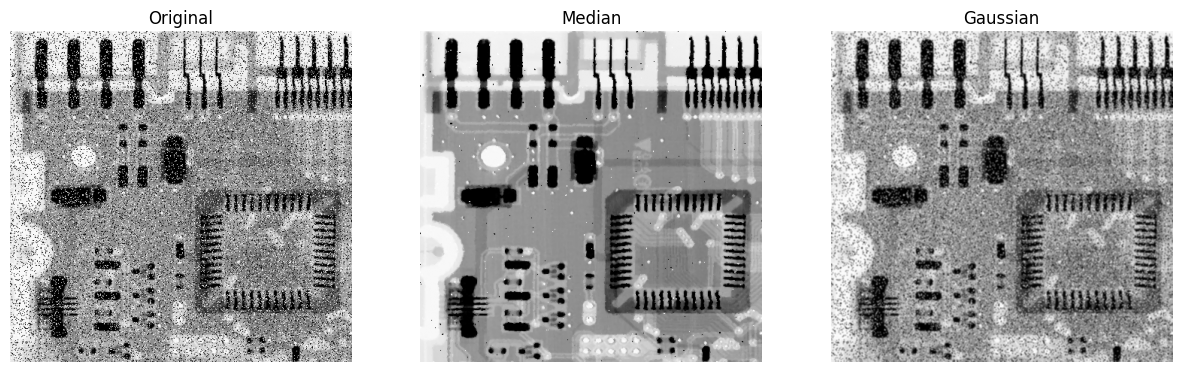

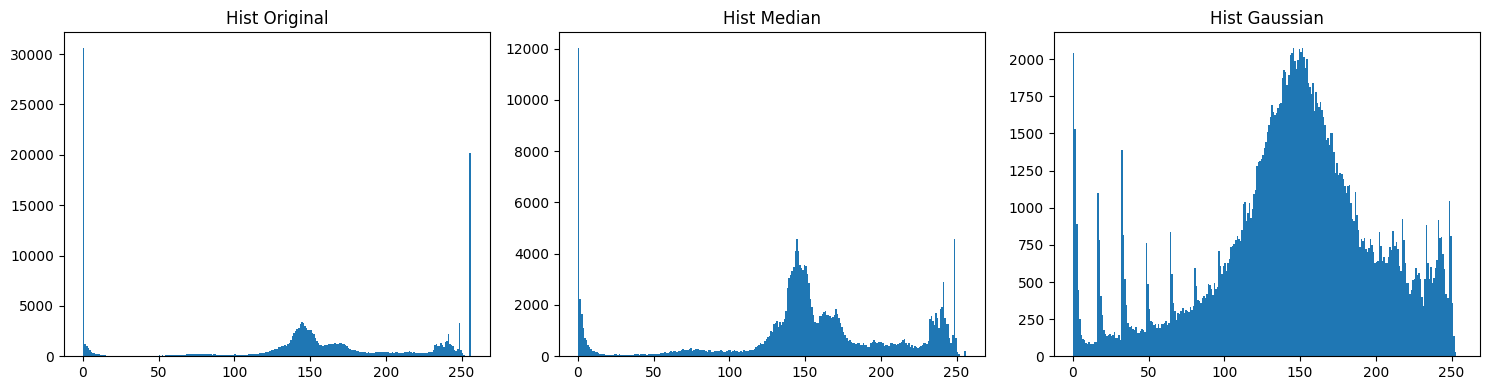

In [15]:
pcb = cv2.imread('pictures/pcb.tif', 0)
median_out = cv2.medianBlur(pcb, 3)
gauss_out = cv2.GaussianBlur(pcb, (3,3), 0)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(pcb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(median_out, cmap='gray')
plt.title('Median')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gauss_out, cmap='gray')
plt.title('Gaussian')
plt.axis('off')
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.hist(pcb.ravel(), bins=256, range=(0,256))
plt.title('Hist Original')
plt.subplot(1,3,2)
plt.hist(median_out.ravel(), bins=256, range=(0,256))
plt.title('Hist Median')
plt.subplot(1,3,3)
plt.hist(gauss_out.ravel(), bins=256, range=(0,256))
plt.title('Hist Gaussian')
plt.tight_layout()
plt.show()

## 6. Histogram Equalization for Contrast Enhancement

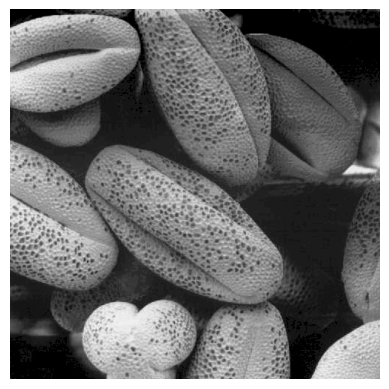

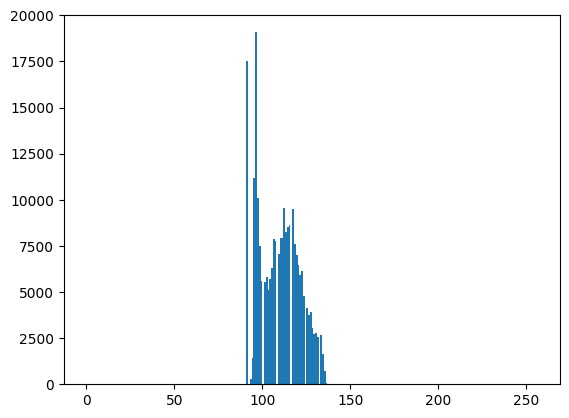

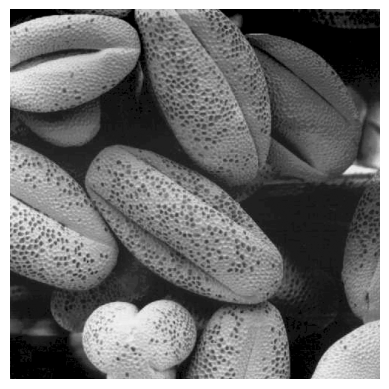

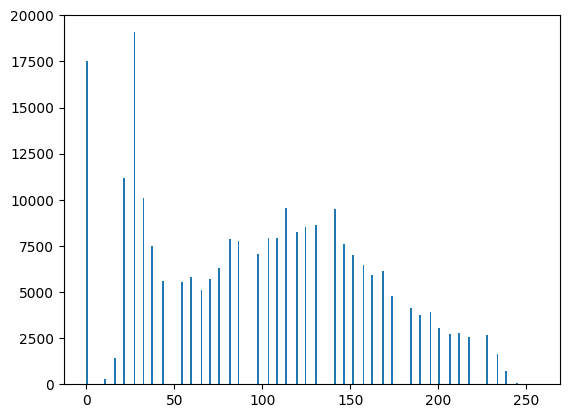

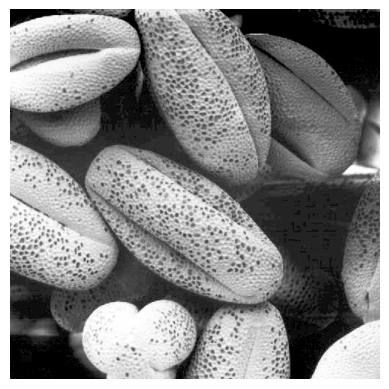

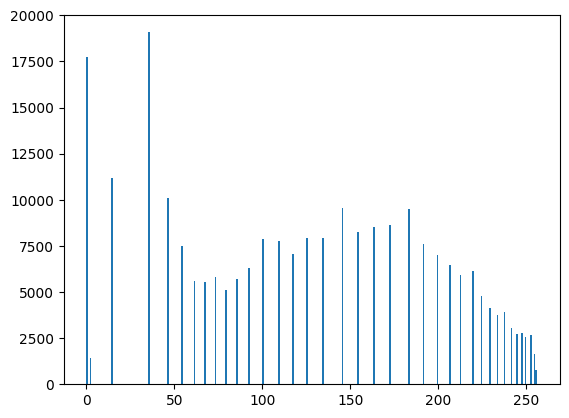

In [16]:
pollen = cv2.imread('pictures/pollen.tif', 0)
plt.imshow(pollen, cmap='gray')
plt.axis('off')
plt.show()

plt.hist(pollen.ravel(), bins=256, range=(0,256))
plt.show()

minval = pollen.min()
maxval = pollen.max()
stretch = ((pollen - minval) / (maxval - minval) * 255).astype(np.uint8)
plt.imshow(stretch, cmap='gray')
plt.axis('off')
plt.show()
plt.hist(stretch.ravel(), bins=256, range=(0,256))
plt.show()

histeq = cv2.equalizeHist(pollen)
plt.imshow(histeq, cmap='gray')
plt.axis('off')
plt.show()
plt.hist(histeq.ravel(), bins=256, range=(0,256))
plt.show()